In [1]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../Data/www/styles/custom.css", "r").read()
    return HTML(styles)
css_styling()


# Synopsis

In this unit we will discuss an important part of data analysis, fitting distributions to data. In the process we will cover:

* How to fit a distribution to data using `scipy`
* Different distributions that may fit data
* How to evaluate the fit of a distribution to data at a basic level

In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as stat
from scipy.optimize import curve_fit

In [2]:
%matplotlib inline

In [3]:
def half_frame(sub, xaxis_label, yaxis_label, font_size = 15, padding = -0.02):
    """Formats frame, axes, and ticks for matplotlib made graphic with half frame."""

    # Format graph frame and tick marks
    sub.yaxis.set_ticks_position('left')
    sub.xaxis.set_ticks_position('bottom')
    sub.tick_params(axis = 'both', which = 'major', length = 7, width = 2, direction = 'out', pad = 10,
                    labelsize = font_size)
    sub.tick_params(axis = 'both', which = 'minor', length = 5, width = 2, direction = 'out', labelsize = 10)
    for axis in ['bottom','left']:
        sub.spines[axis].set_linewidth(2)
        sub.spines[axis].set_position(("axes", padding))
    for axis in ['top','right']:
        sub.spines[axis].set_visible(False)

    # Format axes
    sub.set_xlabel(xaxis_label, fontsize = 1.6 * font_size)
    sub.set_ylabel(yaxis_label, fontsize = 1.6 * font_size)
    
    return

# Fitting data to statistical models

When doing science, one wants to develop a parsimonious description of data or of a system. For example, it is much more parsimonious to describe some data as being drawn from a Gaussian distribution with $\mu = 0$ and $\sigma = 1$ than storing all the data. 

Once we know what disctribution may reproduce the properties of the data, we can test that hypothesis. However, first we must determine the parameters values for the distribution.  


## GPAs of applicants to Chemical Engineering Graduate Program

In order to explore this type of statistical analysis with Python, we will study the undergraduate GPA of the applicants to the Chemical Engineering Graduate Program in 2014.

### Import the data

If you look at the contents of the file, this is what you see:

`GPA UG,GPA UG Max`

`9.1,10`

`"3.61, 3.65 (updated)",4`

`3.27,4`

`3.966,4`

These data have lots of mistakes. For simplicity, we are only going to consider here data that has no issues and for which the maximum GPA is 4.0.


In [3]:
with open("../Data/Day3-Visualization-and-Functions/gpa_data.csv", "r") as data_file:
    all_lines = data_file.readlines()

gpa_list = []
for line in all_lines[1:]:      # Ignore first line with field names
    gpa_list.append( line.strip().split(",") )
    
print(len(gpa_list), gpa_list[:3])
    
gpa = []
for x in gpa_list:
    try:
        if (float(x[1]) == 4.):  # consider only cases for which maximum GPA is 4.0
            try:
                gpa.append(float(x[0]))
            except:
                pass
    except:
        pass

print(len(gpa), gpa[:3])

364 [['9.1', '10'], ['"3.61', ' 3.65 (updated)"', '4'], ['3.27', '4']]
237 [3.27, 3.966, 3.25]


In [5]:
#import scipy.stats as stat
#import numpy as np

mode = float(stat.mode(gpa)[0])
print("The mode of the sample is {0:4.2f}".format(mode))

first_quartile = stat.scoreatpercentile(gpa, 25)
print("The first quartile of the sample is {0:4.2f}".format(first_quartile))

median = stat.scoreatpercentile(gpa, 50)
print("The median of the sample is {0:4.2f}".format(median))

third_quartile = stat.scoreatpercentile(gpa, 75)
print("The third quartile of the sample is {0:4.2f}".format(third_quartile))

skew = stat.skew(gpa)
print("The skewness of the sample is {0:5.3f}".format(skew))

The mode of the sample is 3.80
The first quartile of the sample is 3.47
The median of the sample is 3.64
The third quartile of the sample is 3.80
The skewness of the sample is -0.947


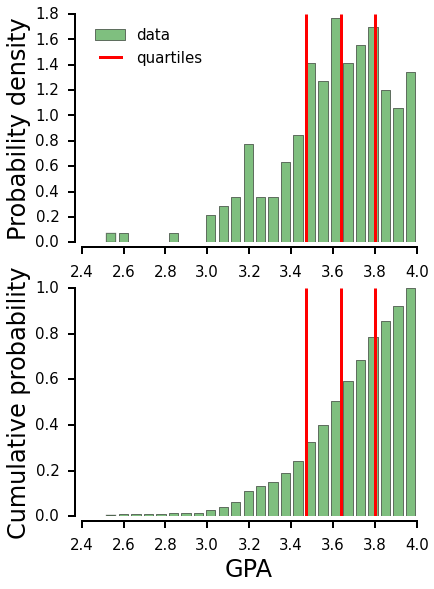

In [6]:
fig = plt.figure( figsize = (6, 9) )
sub1 = fig.add_subplot(2,1,1)
my_font_size = 15

half_frame(sub1, "", "Probability density", font_size = my_font_size)

# Calculate and plot histogram
#
sub1.hist(gpa, 25, normed = 1, rwidth = 0.75, color = "g", alpha = 0.5, histtype = "bar", 
          label = "data", cumulative = False)

sub1.vlines([first_quartile, median, third_quartile], ymin = 0, ymax = 1.8, lw = 3, color = "red", 
            label = "quartiles")

# Format legend
sub1.legend(loc = "best", frameon = False, markerscale = 1.8, fontsize = my_font_size)

# Plot cumulative probability
#
sub2 = fig.add_subplot(2,1,2)
half_frame(sub2, "GPA", "Cumulative probability", font_size = my_font_size)
sub2.hist(gpa, 25, normed = 1, rwidth = 0.75, color = "g", alpha = 0.5, histtype = "bar", 
          label = "data", cumulative = True)
sub2.vlines([first_quartile, median, third_quartile], ymin = 0, ymax = 1., lw = 3, color = "red", 
            label = "quartiles")

plt.show()

The data appears to be sort of Bell shaped but the median does not coincide with the mode... we could use the sample mean and sample standard deviation to generate a Gaussian distribution and compare it to our data. 



## Aside: Pre-defined distributions

The `stats` library of `Scipy` gives us access to lots of modules for well-known distributions.  These include, **but are not at all limited to**,  the binomial, the Poisson, and the Gaussian.

**Binomial distributions** occurs as the result of the repetition of independent trials. Flipping a coin several times.  Throwing one or more dice.

A fair coin has 50% chance of landing on heads and a 50% chance of landing on tails. The binomial distribution with p = 0.5 and n = 50 specifies the probability of tossing k heads. 

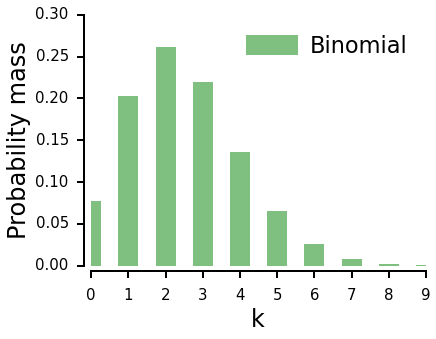

In [7]:
p = 0.05
n = 50

# We can use the properties of the binomial function to define the plot ranges 
x = np.arange(stat.binom.ppf(0.0001, n, p), stat.binom.ppf(0.9999, n, p))
rv = stat.binom(n, p)

fig = plt.figure( figsize = (6, 4.5) )
sub1 = fig.add_subplot(1,1,1)
my_font_size = 15
half_frame(sub1, "k", "Probability mass", font_size = my_font_size)

# Calculate and plot histogram
sub1.vlines(x, 0, rv.pmf(x), color = "g", linewidth = 20, alpha = 0.5, label = "Binomial")

# Format legend
sub1.legend(loc = "best", frameon = False, markerscale = 1.8, fontsize = 1.5 * my_font_size)

plt.show()

Sample mean:  3.609
Sample std. dev:  0.265


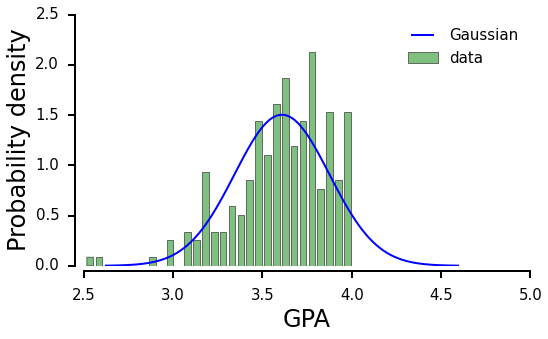

In [8]:
fig = plt.figure( figsize = (8, 4.5) )
sub1 = fig.add_subplot(1,1,1)
my_font_size = 15
half_frame(sub1, "GPA", "Probability density", font_size = my_font_size)

# Calculate and plot histogram
#
sub1.hist(gpa, 30, normed = 1, rwidth = 0.75, color = "g", alpha = 0.5, histtype = "bar", 
          label = "data", cumulative = False)

# Gaussian null model: Use the sample's mean and st_dev 
#
mu = np.mean(gpa)
sigma = np.std(gpa)
print('Sample mean: {0:6.3f}\nSample std. dev: {1:6.3f}'.format(mu, sigma))

x3 = np.linspace(stat.norm.ppf(0.0001, loc = mu, scale = sigma),
                 stat.norm.ppf(0.9999, loc = mu, scale = sigma), 
                 100)
rv3 = stat.norm(loc = mu, scale = sigma)
sub1.plot(x3, rv3.pdf(x3), color = "b", lw = 2, label= "Gaussian")

# Format legend
sub1.legend(loc = "best", frameon = False, markerscale = 1.8, fontsize = my_font_size)

plt.show()

That does not look too good.  However, maybe we are being negatively biased by the fluctuations in the data... We could plot the cumulative distribution, which will smooth out the fluctuations.


Sample mean:  3.609
Sample std. dev:  0.265


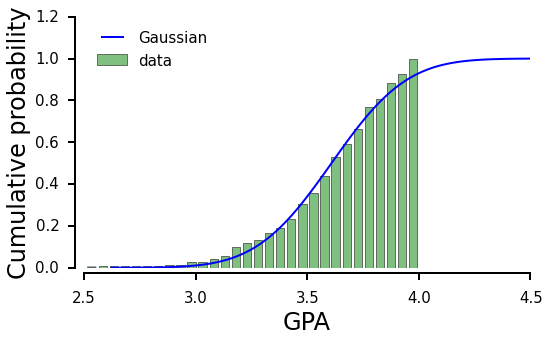

In [9]:
fig = plt.figure( figsize = (8, 4.5) )
sub1 = fig.add_subplot(1,1,1)
my_font_size = 15
half_frame(sub1, "GPA", "Cumulative probability", font_size = my_font_size)

# Calculate and plot histogram, notice how we change the flag value for 'cumulative'
#
sub1.hist(gpa, 30, normed = 1, rwidth = 0.75, color = "g", alpha = 0.5, histtype = "bar", 
          label = "data", cumulative = True) 

## Gaussian null model: Use the sample's mean and st_dev 
#
mu = np.mean(gpa)
sigma = np.std(gpa)
print('Sample mean: {0:6.3f}\nSample std. dev: {1:6.3f}'.format(mu, sigma))

x3 = np.linspace(stat.norm.ppf(0.0001, loc = mu, scale = sigma), 
                 stat.norm.ppf(0.9999, loc = mu, scale = sigma), 
                 100)
sub1.plot(x3, stat.norm.cdf(x3, loc = mu, scale = sigma), color = "b", lw = 2, label= "Gaussian") # Notice we are plotting the cdf now

sub1.set_xlim([2.5, 4.5])
# Format legend
sub1.legend(loc = "best", frameon = False, markerscale = 1.8, fontsize = my_font_size)

plt.show()

This does not look too bad, especially around the 3.5 to 3.8 range of GPA values.  But is it good enough? Is this the right description of the data? 

One thing we are not considering in our analysis is the fact that our data does not include values larger than 4. The distribution is truncated!

In [10]:
# Generated sample cumulative probability
gpa.sort()
cumulative = []
for i, value in enumerate(gpa):
    cumulative.append((i+1) / len(gpa))


In [17]:
# stat.truncnorm requires as input the bounds a, b, and loc and scale

popt, pcov = curve_fit(stat.truncnorm.cdf, gpa, cumulative, p0 = [-100, 0.8, 3.7, 0.3])

a_model = popt[0]
b_model = popt[1]
mu_model = popt[2]
sig_model = popt[3]
print('Fitted mu: {0:6.3f}\nFitted sigma: {1:6.3f}'.format(mu_model, sig_model))
print(a_model, b_model)


Fitted mu:  3.722
Fitted sigma:  0.322
-100.0 0.879666923901


/Users/amaral/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/scipy/optimize/minpack.py:604: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Well! That is unwelcome!  Why is that?

Let's think about it. The value of `a` and `b` actually has to be scaled by $\mu$ and $\sigma$, so the four parameters are **not** independent.  The lack of independence makes the calculation of the covariance problematic.

How can we solve this problem? 

We should start by noting that `a` and `b` are not really parameters. The value of `b` is determined by the maximum GPA (4.0) and the values of $\mu$ and $\sigma$. The value of `a` does not really matter as long as it is far enough from `b`.

We can define a new function that incorporates this knowledge!


In [23]:
def truncated_normal(x, mu, sigma):
    a = -100
    b = (4.0 - mu) / sigma
    
    return stat.truncnorm.cdf(x, a, b, mu, sigma)

In [25]:
popt, pcov = curve_fit(truncated_normal, gpa, cumulative, p0 = [3.7, 0.3])

mu_model = popt[0]
sig_model = popt[1]
a_model = -100
b_model = (4.0 - mu_model) / sig_model

print('Fitted mu: {0:6.3f}\nFitted sigma: {1:6.3f}'.format(mu_model, sig_model))
print(a_model, b_model)
print(pcov)

Fitted mu:  3.729
Fitted sigma:  0.327
-100 0.827927799335
[[  1.03401935e-05   9.19364281e-06]
 [  9.19364281e-06   9.48837634e-06]]


**Problem solved!**

Sample mean:  3.609
Sample std. dev:  0.265
Fitted mu:  3.729
Fitted sigma:  0.327


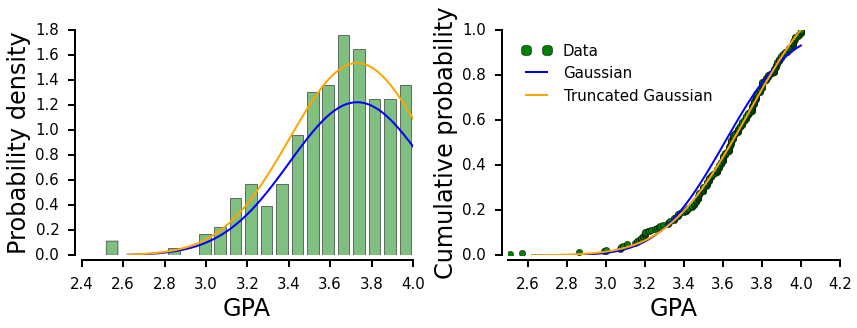

In [26]:
fig = plt.figure( figsize = (12, 4.5) )
sub1 = fig.add_subplot(1,2,2)
sub2 = fig.add_subplot(1,2,1)
my_font_size = 15
half_frame(sub1, "GPA", "Cumulative probability", font_size = my_font_size)
half_frame(sub2, "GPA", "Probability density", font_size = my_font_size)

# 
# Cumulative
#
sub1.plot(gpa, cumulative, "go", label= "Data")
sub1.set_xlim([2.5, 4.2])

## Gaussian null model: Use the sample's mean and st_dev 
mu = np.mean(gpa)
sigma = np.std(gpa)
print('Sample mean: {0:6.3f}\nSample std. dev: {1:6.3f}'.format(mu, sigma))

x3 = np.linspace(stat.norm.ppf(0.0001, loc = mu, scale = sigma), 
                 4., 
                 100)
sub1.plot(x3, stat.norm.cdf(x3, mu, sigma), color = "b", lw = 2, label= "Gaussian") 

## Fitted model
print('Fitted mu: {0:6.3f}\nFitted sigma: {1:6.3f}'.format(mu_model, sig_model))
sub1.plot(x3, stat.truncnorm.cdf(x3, a_model, b_model, loc = mu_model, scale = sig_model), 
          color = "orange", lw = 2, label= "Truncated Gaussian") 

# Format legend
sub1.legend(loc = "best", frameon = False, markerscale = 1.8, fontsize = my_font_size)

#
# Density
#
sub2.hist(gpa, 20, normed = 1, rwidth = 0.75, color = "g", alpha = 0.5, histtype = "bar", 
          label = "Data", cumulative = False) 

sub2.plot(x3, stat.norm.pdf(x3, mu_model, sig_model), color = "b", lw = 2, label= "Gaussian") 

sub2.plot(x3, stat.truncnorm.pdf(x3, a_model, b_model, loc = mu_model, scale = sig_model), 
          color = "orange", lw = 2, label= "Gaussian") 

plt.tight_layout()
plt.show()

These fits look really good. However, they do not tell us whether they provide an adequate representation of the data.  To answer that question we need to determine whether the data is statistically compatible with distributions generated using the truncated Gaussian distribution with the fitted parameters.

In [27]:
# t-test 1 sample

popmean = stat.truncnorm.stats(a_model, b_model, mu_model, sig_model, moments = 'm')
t_data, p = stat.ttest_1samp(gpa, popmean)
print('t-test 1 sample for model: \tt = {0:6.6f} \tp = {1:6.6f}'.format(t_data, p))

# KS test
D_data, p = stat.kstest(gpa, stat.truncnorm.cdf, args = (a_model, b_model, mu_model, sig_model))
print('KS 1 sample test for model: \tD = {0:6.6f} \tp = {1:6.6f}'.format(D_data, p))

t-test 1 sample for model: 	t = -0.243399 	p = 0.807908
KS 1 sample test for model: 	D = 0.035253 	p = 0.929952


Wonderful. Our null hypthesis passed with flying colors!  But did it?

Was what we did even correct?

Let us explore this with a simple computational experiment.  We will generate a number of synthetic data sets drawn from the fitted truncated Gaussian and what these statistical test tell us when we do the test against the generated parameter values vs when we perform a fit to estimate the parameter values.


In [28]:
# Generate synthetic data set and make fit

print('Input mu: {0:6.3f}\nInput sigma: {1:6.3f}'.format(mu_model, sig_model))
print()

xv = stat.truncnorm.rvs(a_model, b_model, loc = mu_model, scale = sig_model, size = len(gpa))
xv.sort()
cumulative = []
for i, value in enumerate(xv):
        cumulative.append((i+1) / len(xv))

popt, pcov = curve_fit(truncated_normal, xv, cumulative, p0 = [3.7, 0.3])

mu_fit = popt[0]
sig_fit = popt[1]
a_fit = -100
b_fit = (4.0 - mu_fit) / sig_fit
print('Fitted mu: {0:6.3f}\nFitted sigma: {1:6.3f}'.format(mu_fit, sig_fit))



Input mu:  3.729
Input sigma:  0.327

Fitted mu:  3.765
Fitted sigma:  0.331


In [29]:
# t-test 1 sample

popmean = stat.truncnorm.stats(a_model, b_model, mu_model, sig_model, moments = 'm')
t, p = stat.ttest_1samp(xv, popmean)
print('t-test 1 sample for model: \tt = {0:6.6f} \tp = {1:6.6f}'.format(t, p))
popmean = stat.truncnorm.stats(a_fit, b_fit, mu_fit, sig_fit, moments = 'm')
t, p = stat.ttest_1samp(xv, popmean)
print('t-test 1 sample for fit: \tt = {0:6.6f} \tp = {1:6.6f}'.format(t, p))

print()

# KS test
D, p = stat.kstest(xv, stat.truncnorm.cdf, args = (a_model, b_model, mu_model, sig_model))
print('KS 1 sample test for model: \tD = {0:6.6f} \tp = {1:6.6f}'.format(D, p))
D, p = stat.kstest(xv, stat.truncnorm.cdf, args = (a_fit, b_fit, mu_fit, sig_fit))
print('KS 1 sample test for fit: \tD = {0:6.6f} \tp = {1:6.6f}'.format(D, p))

t-test 1 sample for model: 	t = 0.763668 	p = 0.445828
t-test 1 sample for fit: 	t = -0.245182 	p = 0.806528

KS 1 sample test for model: 	D = 0.070144 	p = 0.185222
KS 1 sample test for fit: 	D = 0.043882 	p = 0.751438


The t and D statistics systematically take lower values when compared to the fitted parameters.  That means that the `p-value` we are calculating may be an over-estimate...

## Monte Carlo methods

So called Monte Carlo methods, make use of computers to simulate stochastic processes. We will use such stochastic simulations now to investigate this problem.

In [30]:
# Write your code here

N_repetitions = 1000
D_statistic = []
t_statistic = []
D_statistic_fit = []
t_statistic_fit = []




In [31]:
#answer
for run in range(N_repetitions):
    # Generate synthetic data set
    xv = stat.truncnorm.rvs(a_model, b_model, loc = mu_model, scale = sig_model, size = len(gpa))
    xv.sort()
    cumulative = []
    for i, value in enumerate(xv):
        cumulative.append((i+1) / len(xv))
        
    # Fit truncated Gaussian
    popt, pcov = curve_fit(truncated_normal, xv, cumulative, p0 = [3.7, 0.3])

    mu_fit = popt[0]
    sig_fit = popt[1]
    a_fit = -100
    b_fit = (4.0 - mu_fit) / sig_fit
    
    # Obtain value of t-statistic
    popmean = stat.truncnorm.stats(a_model, b_model, mu_model, sig_model, moments = 'm')
    t, p = stat.ttest_1samp(xv, popmean)
    t_statistic.append(t)

    popmean = stat.truncnorm.stats(a_fit, b_fit, mu_fit, sig_fit, moments = 'm')
    t, p = stat.ttest_1samp(xv, popmean)
    t_statistic_fit.append(t)
    
    # Obtain value of D-statistic
    D, p = stat.kstest(xv, stat.truncnorm.cdf, args = (a_model, b_model, mu_model, sig_model), alternative = 'greater')
    D_statistic.append(D)
    
    D, p = stat.kstest(xv, stat.truncnorm.cdf, args = (a_fit, b_fit, mu_fit, sig_fit), alternative = 'greater')
    D_statistic_fit.append(D)


In [32]:
print(max(D_statistic), min(D_statistic))
print(max(D_statistic_fit), min(D_statistic_fit))

0.113185485253 0.00101136725026
0.0664905452403 0.0161882165971


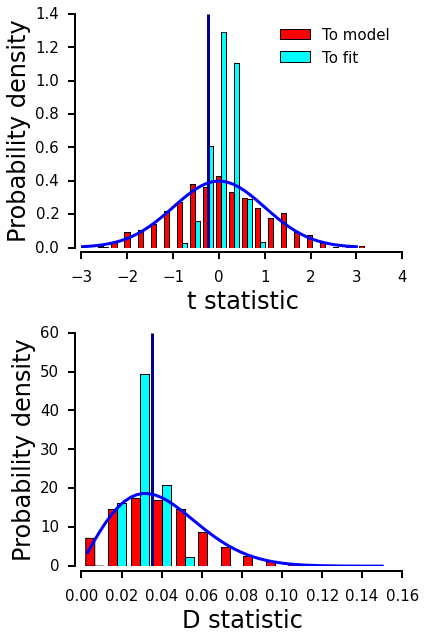

In [35]:
fig = plt.figure( figsize = (6, 9) )
my_font_size = 15

sub1 = fig.add_subplot(2,1,1)
sub2 = fig.add_subplot(2,1,2)

half_frame(sub1, "t statistic", "Probability density", font_size = my_font_size)
half_frame(sub2, "D statistic", "Probability density", font_size = my_font_size)

sub1.hist([t_statistic, t_statistic_fit], bins = 21, normed = 1, color = ['r', 'cyan'], histtype = 'bar',
         label = ['To model', 'To fit'], cumulative = False)

sub2.hist([D_statistic, D_statistic_fit], bins = 10, normed = 1, color = ['r', 'cyan'], histtype = 'bar',
         cumulative = False)

popt, pcov = curve_fit(truncated_normal, xv, cumulative, p0 = [3.7, 0.3])

mu_fit = popt[0]
sig_fit = popt[1]
a_fit = -100
b_fit = (4.0 - mu_fit) / sig_fit

#
# Plot Student's t distribution for validation
#
xt = np.linspace(-3, 3, 50)
df = len(gpa) - 1
sub1.plot(xt, stat.t.pdf(xt, df), lw = 3)
sub1.vlines(t_data, 0, 1.4, lw = 3, color = 'darkblue')

#
# Plot KS distribution for validation
#
xD = np.linspace(0, 0.15, 50)
sub2.plot(xD, stat.ksone.pdf(xD, len(gpa)), lw = 3)
sub2.vlines(D_data, 0, 60, lw = 3, color = 'darkblue')


# Format legend
sub1.legend(loc = "best", frameon = False, markerscale = 1.8, fontsize = my_font_size)

plt.tight_layout()
plt.show()

These plots make it clear that we still cannot reject the null hypothesis when we do things correctly.  However, they also demonstrate that the thoughtless use of the standard statistical tests could have led us to the wrong conclusion in other situations.